# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Sabemos que a renda de um cliente é uma variável muito importante no mercado de crédito. Precisamos dela para saber qual o limite ideal de um cartão de crédito ou se vale a pena conceder um empréstimo em particular. 

Neste caderno, pretendemos entender como as variáveis da base de dados fornecida podem ajudar a prever a renda dos clientes e a caracterizá-los de acordo com seus ganhos.

## Etapa 2 Crisp-DM: Entendimento dos dados

Nesta etapa, vamos explorar a base de dados para verificar tipos de dados, distribuições, correlações, dados faltantes ou quaisquer inconsistências no *dataset*.


### Dicionário de dados

Vamos começar descrevendo as colunas:


| Variável                | Descrição                                                 | Tipo                  |
|:-----------------------:|:---------------------------------------------------------:|:---------------------:|
| data_ref                | Data do registro.                                         | Data         (string) |
| id_cliente              | Identificador único de cada cliente.                      | Numérica    (inteiro) |
| sexo                    | Sexo do cliente (F/M).                                    | Categórica   (string) |
| posse_de_veiculo        | Cliente possui veículo proprio?                           | Categórica (booleano) |
| posse_de_imovel         | Cliente possui imóvel próprio?                            | Categórica (booleano) |
| qtd_filhos              | Número de filhos por cliente.                             | Numérica    (inteiro) |
| tipo_renda              | Tipo de renda do cliente (empresário, assalariado, etc.). | Categórica   (string) |
| educacao                | Nível de escolaridade do cliente.                         | Categórica   (string) |
| estado_civil            | Estado civil do cliente                                   | Categórica   (string) |
| tipo_residencia         | Tipo de residência do cliente (casa, apto., etc.).        | Categórica   (string) |
| idade                   | Idade do cliente.                                         | Numérica    (inteiro) |
| tempo_emprego           | Tempo do cliente no emprego atual.                        | Numérica      (float) |
| qt_pessoas_residencia   | Quantidade de moradores da residência do cliente.         | Numérica    (inteiro) |
| renda                   | Renda do cliente.                                         | Numérica      (float) |





#### Carregando os pacotes

É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa. Para esta análise, utilizaremos os seguintes pacotes:
1. **Pandas**: biblioteca mais usada para tratamento de dados em python.
2. **Matplotlib**: um pacote bastante poderoso para plotagem de gráficos.
3. **Seaborn**: baseado no Matplotlib, fornece uma interface amigável para a plotagem de certos tipos de gráficos.
4. **YData profiling**: antigo pandas_profiling, simplifica bastante a análise descritiva. 
5. **Scikit Learn**: pacote dedicado à aprendizagem de máquina para criar avaliar o modelo.
6. **Picke**: será usado para salvar o medolo final.

In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

import pickle

#### Carregando os dados
O comando ```pd.read_csv``` é um comando da biblioteca pandas (importada como **pd**) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [2]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [3]:
renda.head(10)

Unnamed: 0    data_ref  id_cliente sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01       15056    F             False             True   
1           1  2015-01-01        9968    M              True             True   
2           2  2015-01-01        4312    F              True             True   
3           3  2015-01-01       10639    F             False             True   
4           4  2015-01-01        7064    M              True            False   
5           5  2015-01-01       10581    F             False             True   
6           6  2015-01-01        7129    F             False             True   
7           7  2015-01-01        9952    F             False             True   
8           8  2015-01-01         883    F             False             True   
9           9  2015-01-01        8070    M              True             True   

   qtd_filhos        tipo_renda           educacao estado_civil  \
0           0        Empresário         Secundário     Solteiro   
1           0       Assalariado  Superior completo       Casado   
2           0        Empresário  Superior completo       Casado   
3           1  Servidor público  Superior completo       Casado   
4           0       Assalariado         Secundário     Solteiro   
5           0       Assalariado  Superior completo       Casado   
6           0        Empresário  Superior completo        Viúvo   
7           0        Empresário         Secundário       Casado   
8           0       Assalariado         Secundário       Casado   
9           0       Assalariado  Superior completo       Casado   

  tipo_residencia  idade  tempo_emprego  qt_pessoas_residencia     renda  
0            Casa     26       6.602740                    1.0   8060.34  
1            Casa     28       7.183562                    2.0   1852.15  
2            Casa     35       0.838356                    2.0   2253.89  
3            Casa     30       4.846575                    3.0   6600.77  
4   Governamental     33       4.293151                    1.0   6475.97  
5            Casa     39       4.345205                    2.0   1445.87  
6            Casa     55       6.378082                    1.0   1726.03  
7            Casa     36       3.104110                    2.0   2515.98  
8            Casa     50      18.605479                    2.0   3420.34  
9            Casa     60      10.558904                    2.0  12939.14

In [4]:
renda.id_cliente.value_counts()

9948     6
9351     6
8635     6
6356     6
5573     6
        ..
348      1
12243    1
677      1
292      1
14651    1
Name: id_cliente, Length: 9845, dtype: int64

Até aqui, podemos tirar as seguintes conclusões:

* A variável ```Unnamed: 0``` contém apenas o índice de cada linha, sendo irrelevante para a nossa análise.
* Não  faz sentido que a variével ```qt_pessoas_residencia``` seja do tipo ponto flutuante.
* A variável ```data_ref``` pode ser convertida para o tipo data nativo do Pandas.
* Podemos converter as variáveis do formato **string** para o tipo categórico nativo do Pandas.
* É possível indexar a tabela  por pares (data, cliente)

A partir das observações acima, podemos fazer uma pré-limpeza nos dados:

In [5]:
renda.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore') #Ignora os erros pra não dar problema caso a célula seja rodada de novo
renda['qt_pessoas_residencia'] = renda.qt_pessoas_residencia.astype(int)
renda['data_ref'] = pd.to_datetime(renda['data_ref'])
for coluna in ['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']:
    renda[coluna] = renda[coluna].astype('category')
renda.info()
renda.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   data_ref               15000 non-null  datetime64[ns]
 1   id_cliente             15000 non-null  int64         
 2   sexo                   15000 non-null  category      
 3   posse_de_veiculo       15000 non-null  bool          
 4   posse_de_imovel        15000 non-null  bool          
 5   qtd_filhos             15000 non-null  int64         
 6   tipo_renda             15000 non-null  category      
 7   educacao               15000 non-null  category      
 8   estado_civil           15000 non-null  category      
 9   tipo_residencia        15000 non-null  category      
 10  idade                  15000 non-null  int64         
 11  tempo_emprego          12427 non-null  float64       
 12  qt_pessoas_residencia  15000 non-null  int64         
 13  r

data_ref  id_cliente sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos  \
0 2015-01-01       15056    F             False             True           0   
1 2015-01-01        9968    M              True             True           0   
2 2015-01-01        4312    F              True             True           0   
3 2015-01-01       10639    F             False             True           1   
4 2015-01-01        7064    M              True            False           0   
5 2015-01-01       10581    F             False             True           0   
6 2015-01-01        7129    F             False             True           0   
7 2015-01-01        9952    F             False             True           0   
8 2015-01-01         883    F             False             True           0   
9 2015-01-01        8070    M              True             True           0   

         tipo_renda           educacao estado_civil tipo_residencia  idade  \
0        Empresário         Secundário     Solteiro            Casa     26   
1       Assalariado  Superior completo       Casado            Casa     28   
2        Empresário  Superior completo       Casado            Casa     35   
3  Servidor público  Superior completo       Casado            Casa     30   
4       Assalariado         Secundário     Solteiro   Governamental     33   
5       Assalariado  Superior completo       Casado            Casa     39   
6        Empresário  Superior completo        Viúvo            Casa     55   
7        Empresário         Secundário       Casado            Casa     36   
8       Assalariado         Secundário       Casado            Casa     50   
9       Assalariado  Superior completo       Casado            Casa     60   

   tempo_emprego  qt_pessoas_residencia     renda  
0       6.602740                      1   8060.34  
1       7.183562                      2   1852.15  
2       0.838356                      2   2253.89  
3       4.846575                      3   6600.77  
4       4.293151                      1   6475.97  
5       4.345205                      2   1445.87  
6       6.378082                      1   1726.03  
7       3.104110                      2   2515.98  
8      18.605479                      2   3420.34  
9      10.558904                      2  12939.14

Outro ponto interessamte é que alguns clientes têm mais de um registro, permitindo que sejam feitas análises temporais por cliente.

#### Entendimento dos dados - Univariada

Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis isoladamente. Aqui, quem nos ajuda é o pacote ```ydata_profiling```, antigo ```pandas_profiling```. 

In [6]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Alguns pontos sobre o relatório acima:
* A variável ```tempo_emprego``` tem cerca de 17% de registros faltantes.
* O YData nos alerta sobre muitos zeros em ```qtd_filhos```, mas é esperado que muitos clientes não tenham filhos.
* De longe, a maioria dos clientes possui casa própria.
* Cerca de dois terços dos clientes são mulheres.
* A distribuição da renda é bastante assimétrica.

A célula abaixo salva a análise em arquivo.

In [7]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas


Nesta fase, vamos explorar as relações entre as variáveis da nossa base de dados.

Para isso, vamos criar um novo relatório sem as opções ```explorative``` e ```minimal```

In [8]:
prof = ProfileReport(renda)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Este novo relatório nos agregou as seguintes novas informações:

* Cerca de 3% dos registro na base de dados são duplicados.
* Por motivos óbvios, existe uma correlação muito forte entre as variáveis ```qtd_filhos``` e ```qt_pessoas_residencia```.
* Além disso, o YData também alerta para uma alta correlação entre ```qt_pessoas_residencia``` e ```estado_civil```, o que também faz sentido.

Salvemos a análise mais completa em um arquivo:

In [9]:
prof.to_file('./output/renda_analisys_complete.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Já corrigimos os tipos de dados para facilitar a análise na etapa passada.



### Limpeza dos Dados

A próxima célula remove os dados faltantes e os duplicados.

In [10]:
renda.drop_duplicates(inplace=True)
renda.dropna(inplace=True)

### Construção de Variável

Variáveis financeiras, como a renda, costumam ser mais fáceis de se trabalhar na escala logarítimica. Pensando nisso, vamos criar a coluna ```log_renda``` a partir dessa transformação.

In [11]:
renda['log_renda'] = np.log(renda['renda'])

### Remoção de Colunas

A seguir, vamos remover as seguintes colunas:
* ```id_cliente```: apenas identifica um cliente
* ```renda```: a ser substituida por ```log_renda```
* ```qtd_filhos```: muito correlata com ```qt_pessoas_residencia```, sendo pior para prever a renda a última.
* ```tipo_residencia```: muito desbalanceada e pouco correlacionada com ```log_renda```

In [12]:
renda.drop(columns=['renda', 'qtd_filhos', 'tipo_residencia', 'id_cliente'], inplace=True, errors='ignore')

### Resultado

A seguir, podemos ver que o YData Profiler não dá mais alertas de inconsistência nos dados.

In [13]:
prof = ProfileReport(renda)
prof.to_file('./output/renda_analisys_prepared.html')
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/home/pedro/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
/home/pedro/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
/home/pedro/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
/home/pedro/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
/home/pedro/.local/lib/python3.10/si

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Criação de Dummies

Modelos de *machine learning* não costumam trabalhar com variáveis categóricas diretamente. Um coluna *dummy* contém 1 ou 0 se o ítem pertence ou não a uma categoria, respectivamente.

In [14]:
renda = pd.get_dummies(renda)
renda.head()

data_ref  posse_de_veiculo  posse_de_imovel  idade  tempo_emprego  \
0 2015-01-01             False             True     26       6.602740   
1 2015-01-01              True             True     28       7.183562   
2 2015-01-01              True             True     35       0.838356   
3 2015-01-01             False             True     30       4.846575   
4 2015-01-01              True            False     33       4.293151   

   qt_pessoas_residencia  log_renda  sexo_F  sexo_M  tipo_renda_Assalariado  \
0                      1   8.994711       1       0                       0   
1                      2   7.524102       0       1                       1   
2                      2   7.720413       1       0                       0   
3                      3   8.794942       1       0                       0   
4                      1   8.775854       0       1                       1   

   ...  educacao_Primário  educacao_Pós graduação  educacao_Secundário  \
0  ...                  0                       0                    1   
1  ...                  0                       0                    0   
2  ...                  0                       0                    0   
3  ...                  0                       0                    0   
4  ...                  0                       0                    1   

   educacao_Superior completo  educacao_Superior incompleto  \
0                           0                             0   
1                           1                             0   
2                           1                             0   
3                           1                             0   
4                           0                             0   

   estado_civil_Casado  estado_civil_Separado  estado_civil_Solteiro  \
0                    0                      0                      1   
1                    1                      0                      0   
2                    1                      0                      0   
3                    1                      0                      0   
4                    0                      0                      1   

   estado_civil_União  estado_civil_Viúvo  
0                   0                   0  
1                   0                   0  
2                   0                   0  
3                   0                   0  
4                   0                   0  

[5 rows x 24 columns]

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


Primeiro, vamos separar a base de dados em treino e teste. Separamos os três últimos meses de registros para a base de teste e o restante para a de treino. Dividir os dados dessa forma aumenta a robustez dos testes, que conseguem detectar instabilidade nas variáveis e correlações.


In [15]:
renda_treino = renda[renda.data_ref.dt.year <= 2015]
renda_teste = renda[renda.data_ref.dt.year >= 2016]

Abaixo, separamos as variáveis explicativas da resposta.

In [16]:
X_treino, y_treino = renda_treino.drop(columns=['log_renda', 'data_ref']), renda_treino['log_renda']
X_teste, y_teste = renda_teste.drop(columns=['log_renda', 'data_ref']), renda_teste['log_renda']

### Rodando o modelo


Finalmente, treinamos um modelo de regressão do tipo *Random Forest* com o *Scikit-Learn*. Esse algoritimo foi escolhido porque possui uma boa combinação de simplicidade de uso e performance.

In [17]:
modelo = RandomForestRegressor()
modelo.fit(X_treino, y_treino)

RandomForestRegressor()

## Etapa 5 Crisp-DM: Avaliação dos resultados


A seguir, vamos calcular o **Erro Médio Quadrático** e o **Coeficiente de Determinação R²** para as bases de treino e teste

In [18]:
r2_treino = r2_score(y_treino, modelo.predict(X_treino))
r2_teste = r2_score(y_teste, modelo.predict(X_teste))
mse_treino = mean_squared_error(y_treino, modelo.predict(X_treino))
mse_teste = mean_squared_error(y_teste, modelo.predict(X_teste))

In [19]:
print('Treino:')
print(f' R²: {r2_treino}')
print(f' EMQ: {mse_treino}')
print('Teste:')
print(f' R²: {r2_teste}')
print(f' EMQ: {mse_teste}')

Treino:
 R²: 0.7472337567342111
 EMQ: 0.20262877303889457
Teste:
 R²: 0.44509191030447537
 EMQ: 0.4700162591608544


Para finalizar, vamos vizualizar a comparação do erro do nosso modelo com a dispersão do ```log_renda``` em relação à sua média. Esta última seria o erro de previsão se nosso sistema simplesmente presumisse que qualquer cliente tem renda próxima à média, em escala logarítmica. Se nosso modelo fosse pior que essa previsão ingenua, ele seria completamente inútil!

In [20]:
erro = modelo.predict(X_teste) - y_teste
dispersão = x = y_teste.mean() - y_teste 
df_avaliação = pd.DataFrame({
    'erro_modelo': erro,
    'dispersão_media': dispersão,
}).melt()

<Axes: xlabel='value', ylabel='Count'>

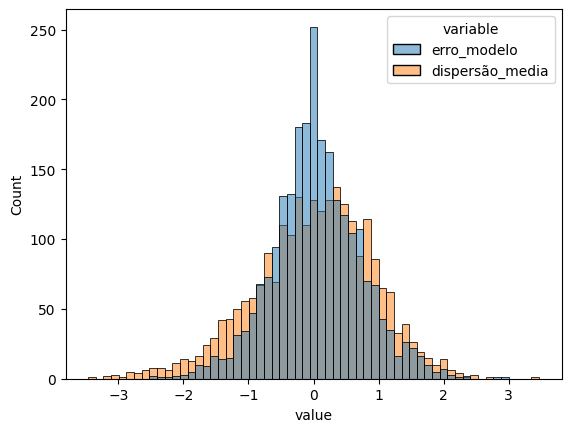

In [21]:
sns.histplot(df_avaliação, x='value', hue='variable')

Com as análises acima, podemos concluir que nosso modelo consegue explicar boa parte da variação da renda dos clientes. Apesar disso, pode não ser suficiente para algumas aplicações. Precisamos lembrar que o erro no mensurado acima está em escala logarítimica, ou seja, um intervalo de confiança entre 7 e 9 vira 1096 a 8103 reais por mês! 

Apesar disso, vamos calcular um intervalo de confiança para o erro do modelo a seguir.

In [22]:
ic_log = erro.quantile(0.05), erro.quantile(0.95)
ic_lin = tuple(np.exp(ic_log))
ic_lin

(0.33977402786580724, 3.2922032164648147)

## Etapa 6 Crisp-DM: Implantação

Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação. Para isso, vamos precisar fazer o seguinte:
* Treinar e salvar o modelo final.
* Extrair função que faz o mesmo preprocessamento que fizemos neste caderno.
* Criar função que desfaz quaisquer operações feitas na saida. Por exemplo, se o modelo foi treinadao com o logarítimo de resposta, aplicamos a função exponencial com a mesma base.
* Criar uma interface para as previsões. Neste caso, será um formulário do Streamlit.

A primeira etapa está a seguir:

In [23]:
X_final = pd.concat([X_treino, X_teste], axis='rows')
y_final = pd.concat([y_treino, y_teste], axis='rows')

In [24]:
modelo.fit(X_final, y_final)

RandomForestRegressor()

In [25]:
bytes_modelo = pickle.dumps(modelo)
with open('./output/modelo_final.pkl', 'wb') as file:
    file.write(bytes_modelo)

In [26]:
with open('./output/x_teste.pkl', 'wb') as file:
    file.write(pickle.dumps(X_teste))